Import necessary packages:

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm

Load data in from csv file

In [45]:
ds = pd.read_csv("S&P 500 Historical Data.csv")
df = pd.DataFrame(ds)
arr = np.array(df)
Date = np.flip(np.transpose(arr[:,np.where(np.array(df.columns) == 'Date')[0]])[0])
Date = pd.to_datetime(Date)
df["Change %"] = df["Change %"].str.replace('%','')
trueLabels = np.where(np.array(df['Change %'], dtype = float) > 0, 1, -1)
df["Price"] = df["Price"].str.replace(',','')
df["Price"] = df["Price"].astype("float64")
df["Open"] = df["Open"].str.replace(',','')
df["Open"] = df["Open"].astype("float64")
df["Low"] = df["Low"].str.replace(',','')
df["Low"] = df["Low"].astype("float64")
df["High"] = df["High"].str.replace(',','')
df["High"] = df["High"].astype("float64")
prices = np.array(df["Price"])
opens = np.array(df['Open'])
lows = np.array(df["Low"])
highs = np.array(df["High"])
data = np.stack([np.arange(len(prices)), prices, opens, lows, highs], axis = 1)
print(data.shape)

(566, 5)


Partition data and true labels into an 80-20 split for training and testing

In [46]:
numTesting = round(len(prices) * 0.2)
testingInd = np.random.choice(len(prices), numTesting, replace = False)
yTest = trueLabels[testingInd]
xTest = data[testingInd]
xTrain = np.delete(data, testingInd, axis = 0)
yTrain = np.delete(trueLabels, testingInd, axis = 0)
print(xTrain.shape, yTrain.shape)


(453, 5) (453,)


Plot data points to infer the best kernel by looking at the separability of the data

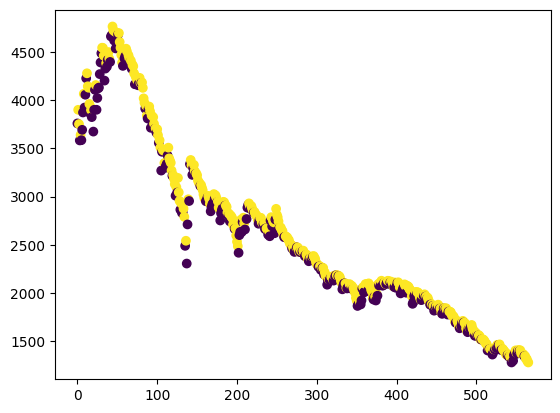

In [47]:
plt.scatter(np.arange(len(trueLabels)), prices, c= trueLabels)

In [49]:
cVal = 2.0
degVal = 2
kernel = 'poly'
accuracies = []
degrees = []
while degVal < 15:  
    svm = sklearn.svm.SVC(C= cVal, kernel= 'poly', degree= degVal)
    svm.fit(xTrain, yTrain)
    verified = yTest * svm.predict(xTest)
    accuracy = np.count_nonzero(verified == 1) / numTesting
    accuracies.append(accuracy)
    degrees.append(degVal)
    degVal += 1

plt.plot(degrees, accuracies)

What about using SVM to predict whether next week's price goes up or down? Here, I shift the data and labels so that each label corresponds to whether the price goes up or down for the next week. Then, I take a new training-testing split of the data

In [ ]:
shiftedData = data[:-1]
shiftedLabels = trueLabels[1:]

plt.scatter(np.arange(len(shiftedLabels)), prices[:-1], c= trueLabels)

testingInd = np.random.choice(len(prices) - 1, numTesting, replace = False)
yTest = trueLabels[testingInd]
xTest = data[testingInd]
xTrain = np.delete(data, testingInd, axis = 0)
yTrain = np.delete(trueLabels, testingInd, axis = 0)
print(xTrain.shape, yTrain.shape)

We then test Kernel Soft Margin SVM similarly on the shifted data

In [ ]:
cVal = 2.0
degVal = 2
kernel = 'poly'
accuracies = []
degrees = []
while degVal < 15:  
    svm = sklearn.svm.SVC(C= cVal, kernel= 'poly', degree= degVal)
    svm.fit(xTrain, yTrain)
    verified = yTest * svm.predict(xTest)
    accuracy = np.count_nonzero(verified == 1) / numTesting
    accuracies.append(accuracy)
    degrees.append(degVal)
    degVal += 1

plt.plot(degrees, accuracies)